In [1]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

Los canales de reserva de hoteles en línea han cambiado drásticamente las posibilidades de reserva y el comportamiento de los clientes. Un número significativo de reservas de hotel se cancelan debido a cancelaciones o no presentaciones. Las razones típicas de las cancelaciones incluyen cambio de planes, conflictos de programación, etc. Esto a menudo se hace más fácil por la opción de hacerlo de forma gratuita o preferiblemente a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es un factor menos deseable y posiblemente decreciente de los ingresos para los hoteles.



# Objetivos

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
#Chequeo de tipos de datos detectados para cada variable
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
#ANALISIS DE NULOS

pd.concat([df.isna().sum().to_frame('Absoluto'),
            (100*df.isna().sum()/len(df)).to_frame('porcentual')], axis =1).style.format({'porcentual':'{:.2f}%'})

,Absoluto,porcentual
Booking_ID,0,0.00%
no_of_adults,0,0.00%
no_of_children,0,0.00%
no_of_weekend_nights,0,0.00%
no_of_week_nights,0,0.00%
type_of_meal_plan,0,0.00%
required_car_parking_space,0,0.00%
room_type_reserved,0,0.00%
lead_time,0,0.00%
arrival_year,0,0.00%


# Conversión de tipos 

In [9]:
for i in df.type_of_meal_plan.unique():
    if i == 'Meal Plan 1':
        df.type_of_meal_plan.replace('Meal Plan 1',1,inplace=True)
    elif i == 'Meal Plan 2':
        df.type_of_meal_plan.replace('Meal Plan 2',2,inplace=True)
    elif i == 'Meal Plan 3':
        df.type_of_meal_plan.replace('Meal Plan 3',3,inplace=True)
    elif i == 'Not Selected':
        df.type_of_meal_plan.replace('Not Selected',4,inplace=True)

In [12]:
for i in df.room_type_reserved.unique():
    if i == 'Room_Type 1':
        df.room_type_reserved.replace('Room_Type 1',1,inplace=True)
    elif i =='Room_Type 2':
        df.room_type_reserved.replace('Room_Type 2',2,inplace=True)
    elif i == 'Room_Type 3':
        df.room_type_reserved.replace('Room_Type 3',3,inplace=True)
    elif i == 'Room_Type 4':
        df.room_type_reserved.replace('Room_Type 4',4,inplace=True)
    elif i == 'Room_Type 5':
        df.room_type_reserved.replace('Room_Type 5',5,inplace=True)
    elif i == 'Room_Type 6':
        df.room_type_reserved.replace('Room_Type 6',6,inplace=True)
    elif i == 'Room_Type 7':
        df.room_type_reserved.replace('Room_Type 7',7,inplace=True)

In [15]:
for i in df.market_segment_type.unique():
    if i == 'Offline':
        df.market_segment_type.replace('Offline',1,inplace=True)
    elif i =='Online':
        df.market_segment_type.replace('Online',2,inplace=True)
    elif i == 'Corporate':
        df.market_segment_type.replace('Corporate',3,inplace=True)
    elif i == 'Aviation':
        df.market_segment_type.replace('Aviation',4,inplace=True)
    elif i == 'Complementary':
        df.market_segment_type.replace('Complementary',5,inplace=True)

In [16]:
df.no_of_previous_cancellations.unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [17]:
df.no_of_previous_cancellations.replace({4,5,6,7,8,9,10,11,12,13},3,inplace=True)

In [18]:
df.no_of_previous_bookings_not_canceled.unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

In [19]:
df.no_of_previous_bookings_not_canceled.replace({5,  3, 12, 19,  2, 15, 17,  4, 50, 13,  6, 14, 34, 18, 16,
        8, 10, 23, 11, 49, 47, 53,  7,  9, 33, 22, 24, 52, 21, 48, 28, 39,
       25, 20, 38, 26, 51, 42, 37, 35, 56, 44, 27, 55, 45, 30, 57, 31, 46,
       54, 43, 58, 41, 29, 40, 36, 32},1,inplace=True)

In [20]:
df.no_of_previous_bookings_not_canceled.unique()

array([0, 1], dtype=int64)

In [21]:
df.no_of_week_nights.unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [22]:
df.no_of_week_nights.unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [23]:
df.no_of_week_nights.replace({6,7,8,9,10,11,12,13,14,15,16,17},5,inplace=True)

In [24]:
df.market_segment_type.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
df.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [26]:
df.booking_status.replace('Not_Canceled',0,inplace=True)
df.booking_status.replace('Canceled',1,inplace=True)

In [27]:
df.booking_status.unique()

array([0, 1], dtype=int64)

In [28]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [29]:
df.avg_price_per_room=df.avg_price_per_room.astype(int)
df.avg_price_per_room.mean()

103.15729841488628

In [32]:
df2 = df[['no_of_adults', 'no_of_children']]
df2.head()

,no_of_adults,no_of_children
0,2,0
1,2,0
2,1,0
3,2,0
4,2,0


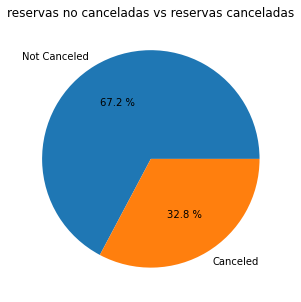

In [34]:
#La primera interrogante es conocer el porcentaje de reservas no canceladas vs las canceladas
fig, ax = plt.subplots(figsize=(5,5))
x = df['booking_status'].value_counts()
etiquetas = ['Not Canceled', 'Canceled']

plt.pie(x , 
        labels = etiquetas,
        autopct = '%0.1f %%'
     )
ax.set_title('reservas no canceladas vs reservas canceladas') 
plt.show()

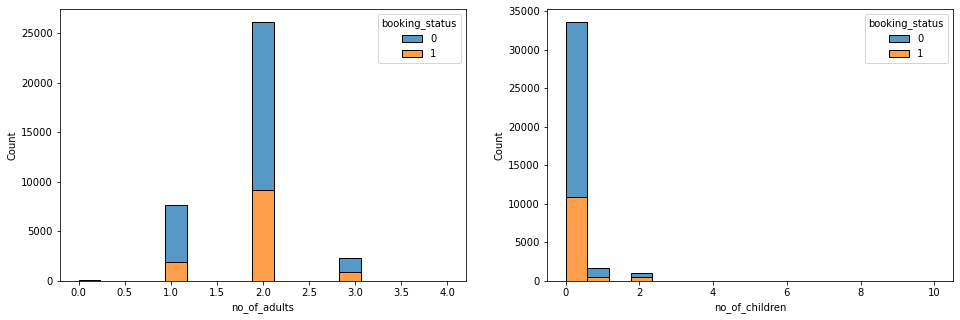

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x='no_of_adults', hue='booking_status', multiple= 'stack', ax=ax[0])
sns.histplot(data=df, x=df[df.columns[1]], hue='booking_status',multiple= 'stack', ax=ax[1])

plt.show()

Gracias a los gráficos anteriores podemos concluir que la mayor cantidad de reservas canceladas se dan en las reservas conformadas por dos adultos y que la cantidad de niños no es un factor detrminante para la cancelación de reservas

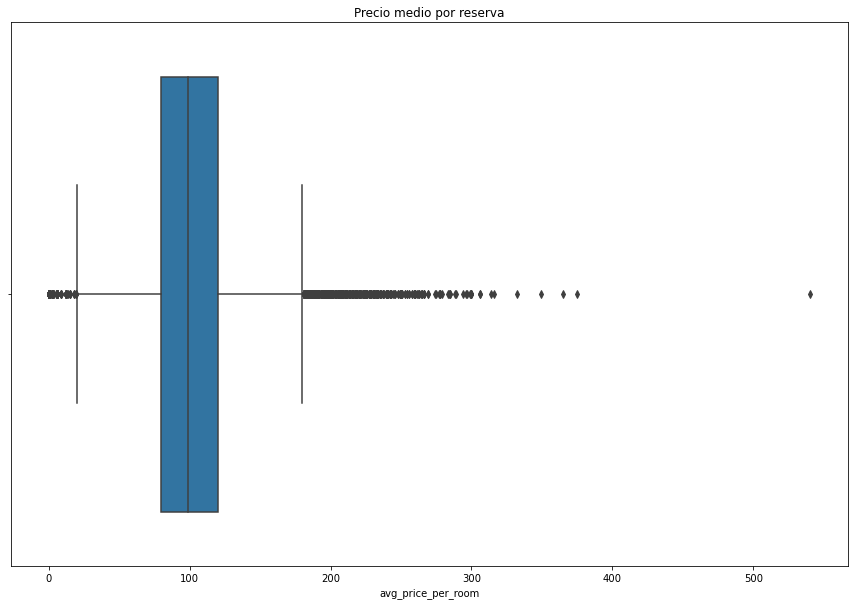

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(df['avg_price_per_room'])
ax.set_title('Precio medio por reserva')
plt.show()

In [37]:
(df['avg_price_per_room']>300).value_counts()

False    36266
True         9
Name: avg_price_per_room, dtype: int64

A partir del gráfico podemos observar que el dataset presenta un valor atípico, el cual supera los $500 euros. Este valor representa un porcentaje mínimo en el total de datos que componen el estudio por lo que se eliminará para prevenir el futuras molestías a la hora de entrenar el modelo de LM.

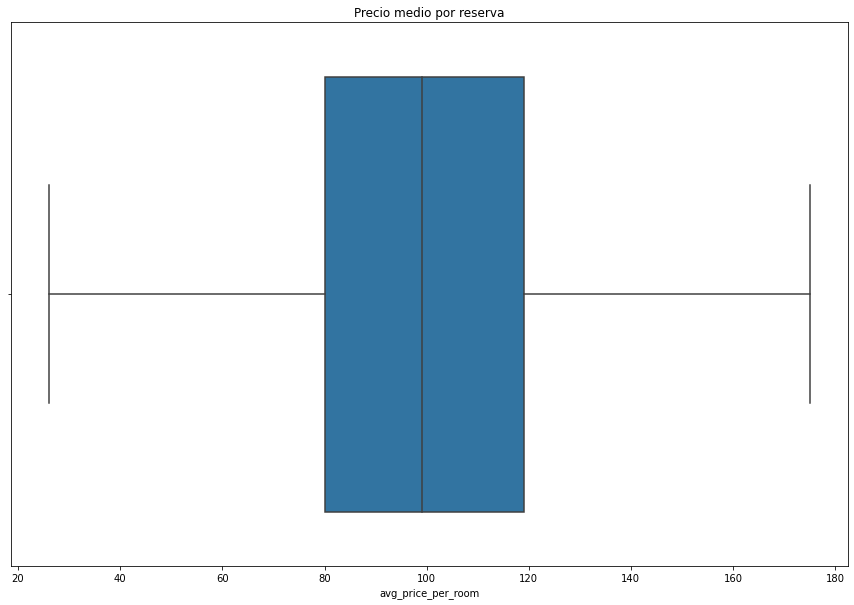

In [38]:
precio_reserva = df[ df['avg_price_per_room'] > 175 ].index
df.drop(precio_reserva , inplace=True)
precio_reserva = df[ df['avg_price_per_room'] < 25 ].index
df.drop(precio_reserva , inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(df['avg_price_per_room'])
ax.set_title('Precio medio por reserva')
plt.show()

Verificamos que el valor atípico fue removido correctamente.


In [39]:
(df['avg_price_per_room']> 175).value_counts()

False    34407
Name: avg_price_per_room, dtype: int64

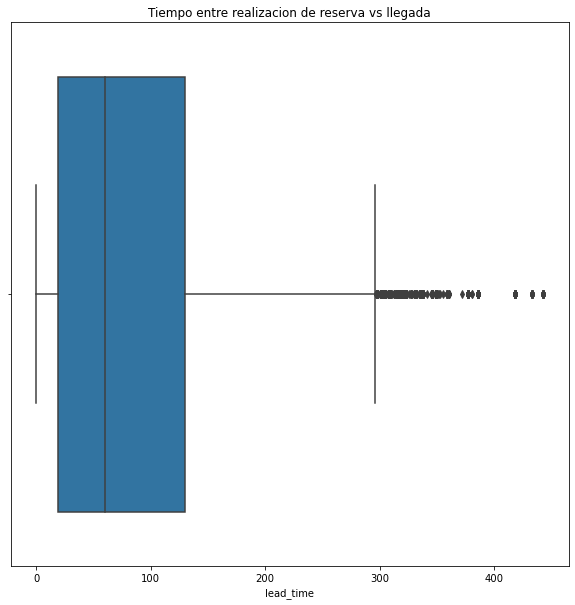

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(df['lead_time'])
ax.set_title('Tiempo entre realizacion de reserva vs llegada')
plt.show()

In [41]:
(df['lead_time']>360).value_counts()

False    34160
True       247
Name: lead_time, dtype: int64

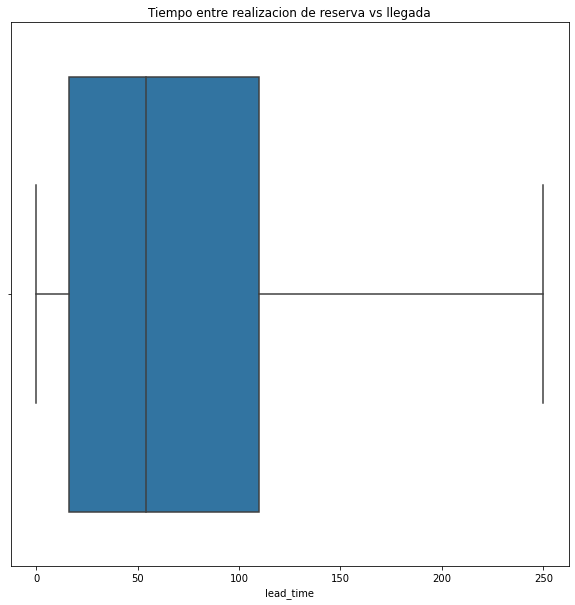

In [42]:
leadtime = df[ df['lead_time'] > 250 ].index
df.drop(leadtime , inplace=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(df['lead_time'])
ax.set_title('Tiempo entre realizacion de reserva vs llegada')
plt.show()

In [43]:
l=df.columns
l.to_list()

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [44]:
df.shape

(31879, 17)

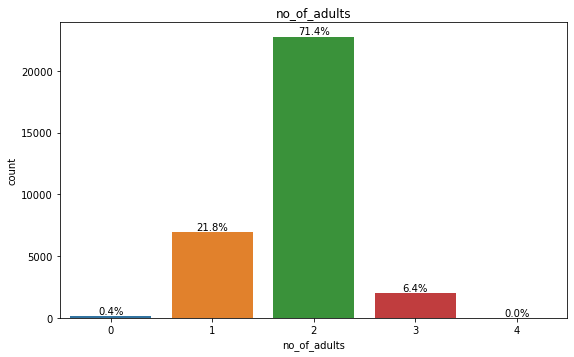

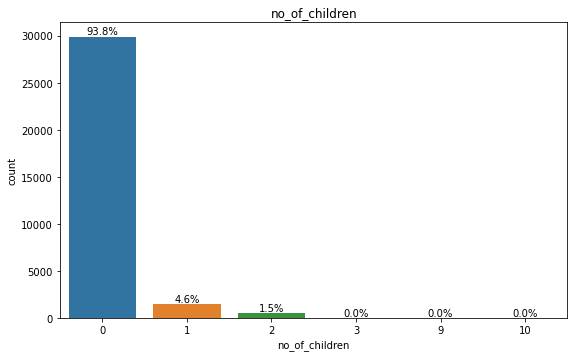

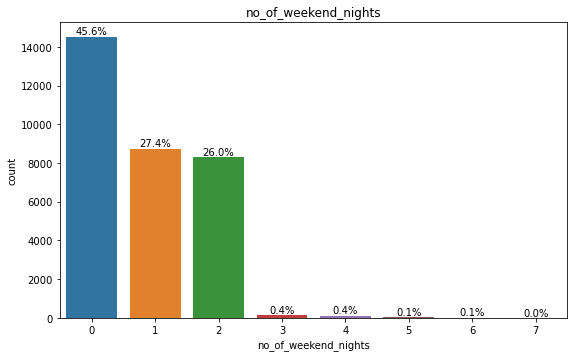

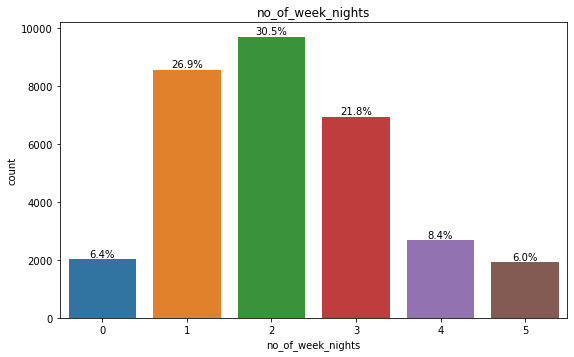

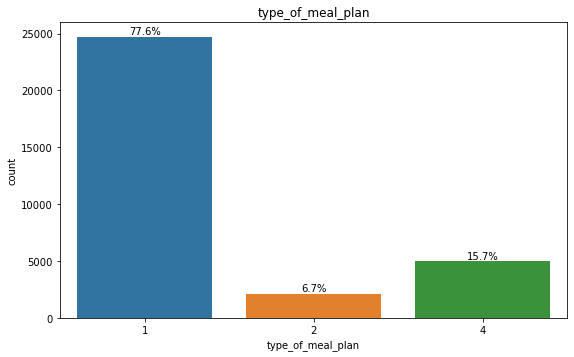

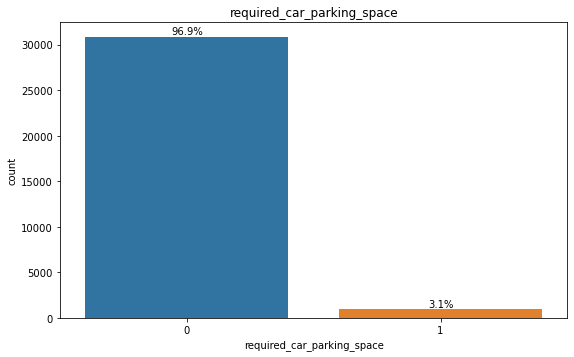

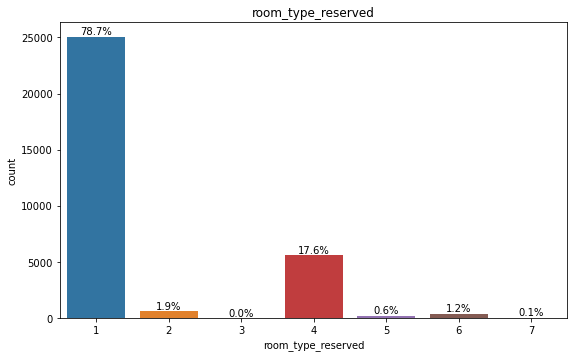

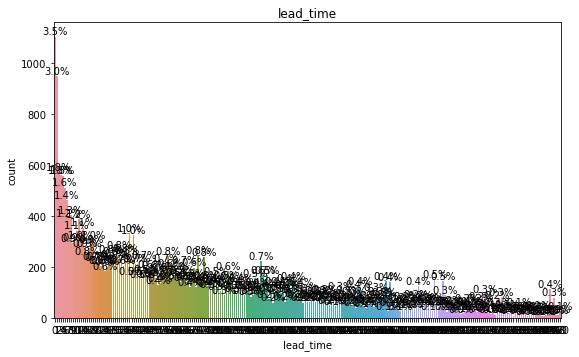

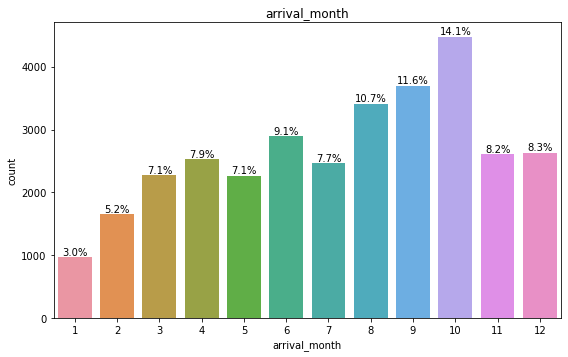

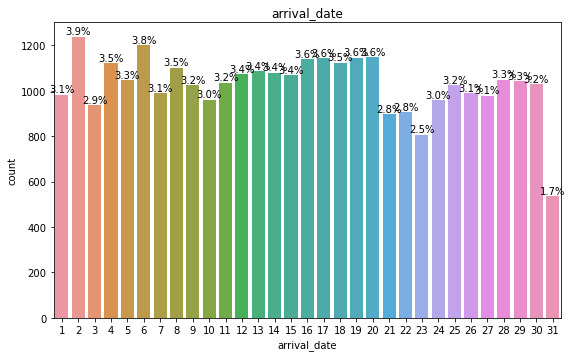

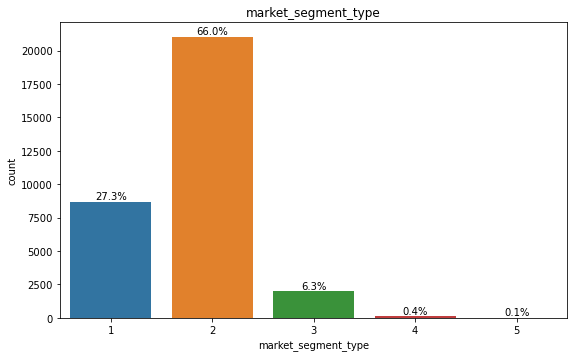

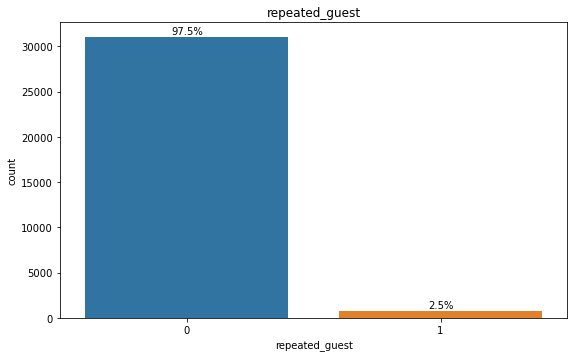

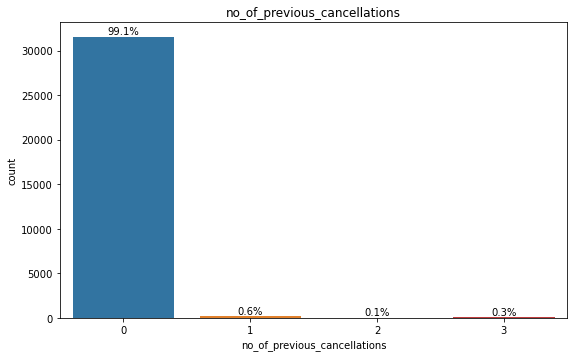

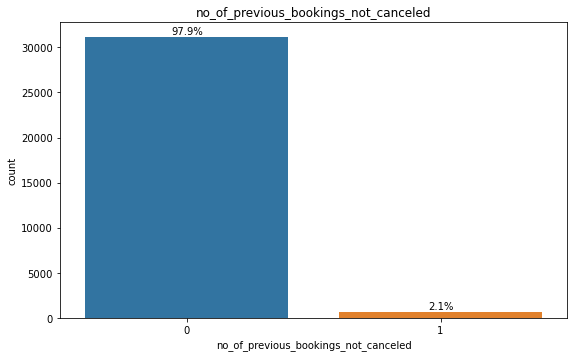

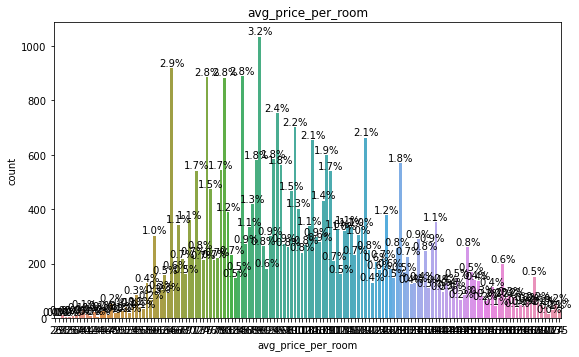

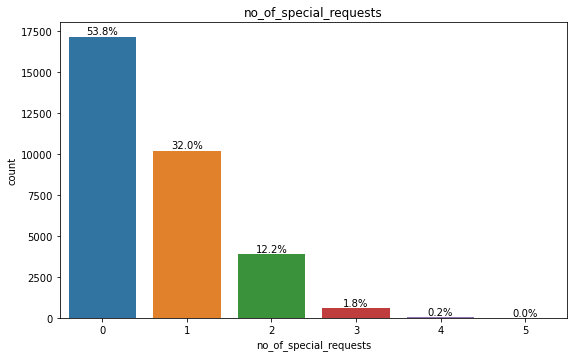

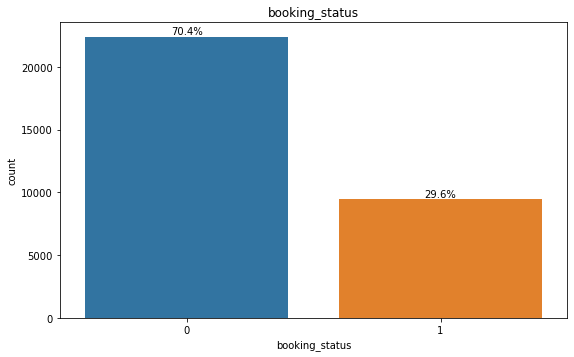

In [45]:
for i in range(0,17):
    plt.figure(figsize = (20,25))
    plt.subplot(4,2,1)
    plt.gca().set_title(l[i])
    ax = sns.countplot(x = l[i] ,data = df)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format((100*y)/31879), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
       

Se observa que la mayoría de las reservas se dan en grupos constituidos por 2 adultos, sin niños. Casi la mitad de las reservas para fines de semana es de una sola noche. Por otro lado, en noches de semana, un 56% se concentra en 1 o 2 noches. El tipo de plan de alimentación se centra en el tipo 1, 1 de cada 10 reservas requieren espacio de estacionamiento, el 78% reserva habitación de tipo 1.
En cuanto al tiempo se refiere, octubre es el mes que mas reservas tiene mientras que enero es el que menos reservas cosechó y los primeros días del mes presentan mayor asiduidad. 
El 99% de los datos se trazan sobre reservas cuyos emisores nunca habían realizado una cancelación.

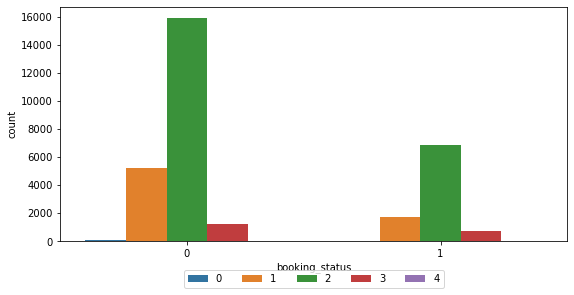

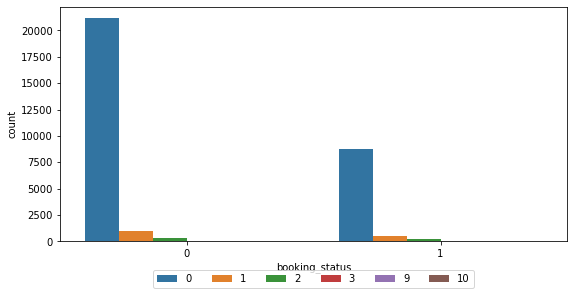

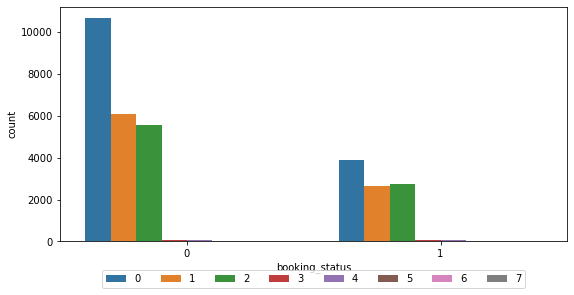

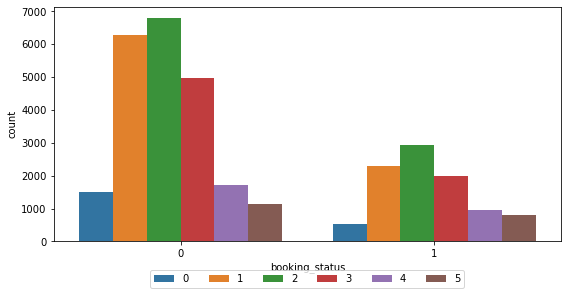

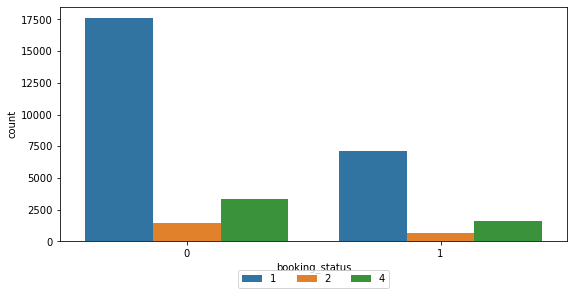

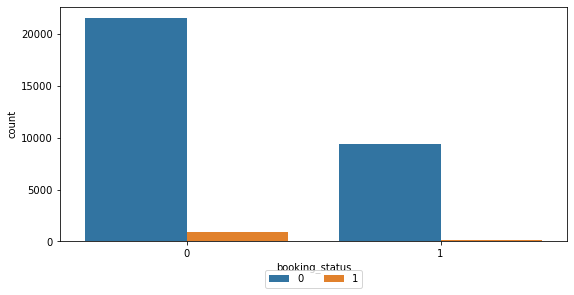

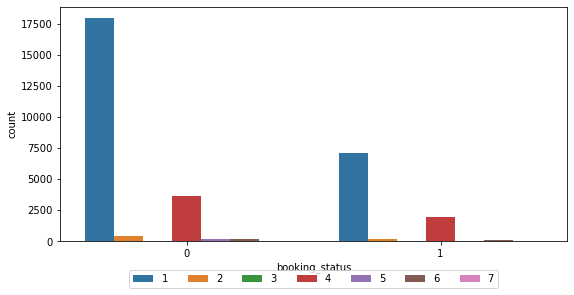

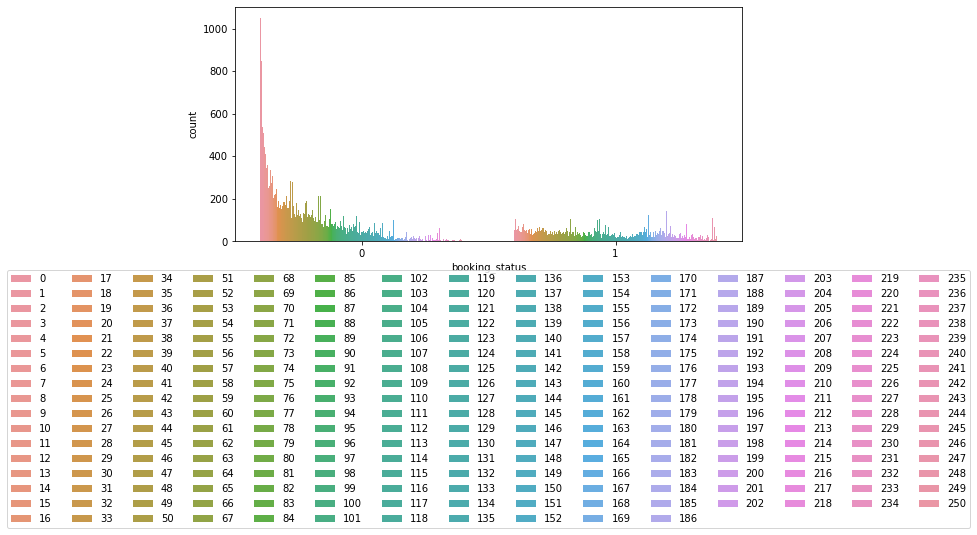

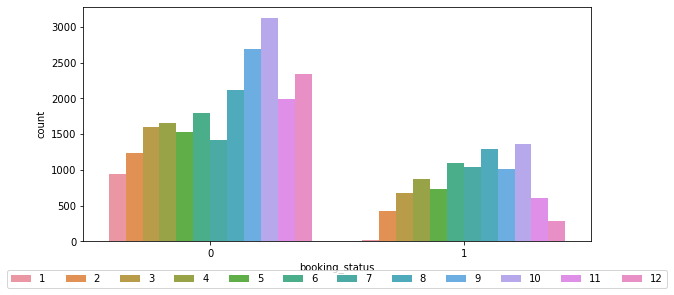

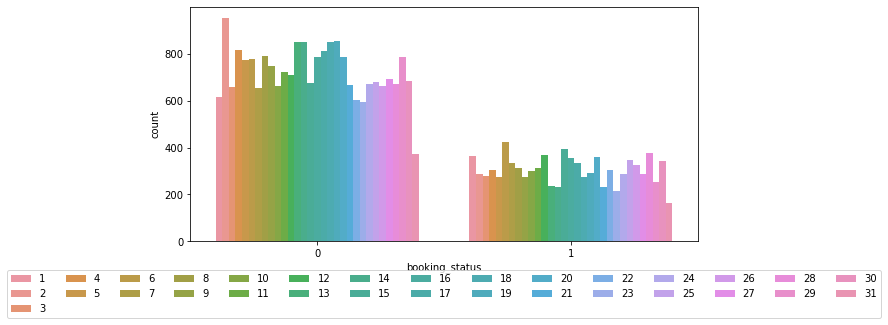

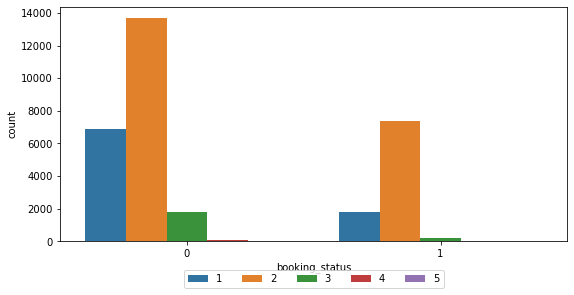

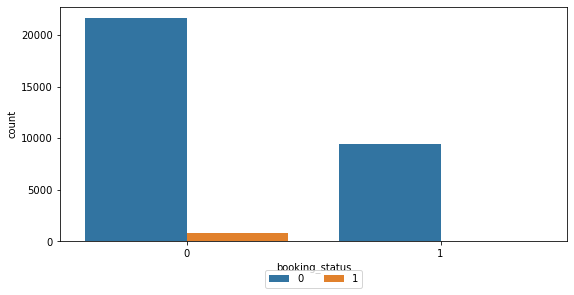

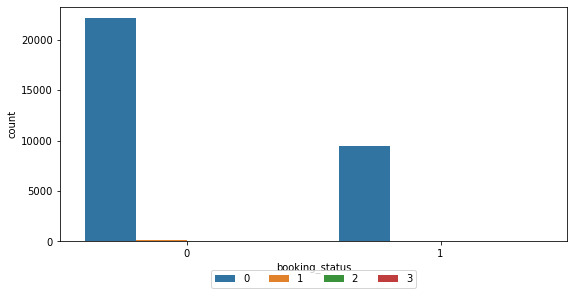

In [46]:
for i in range(0,13):
    plt.figure(figsize = (20, 25))
    plt.subplot(5,2,1)
    sns.countplot(x = 'booking_status', hue = l[i], data = df)
    legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=15)

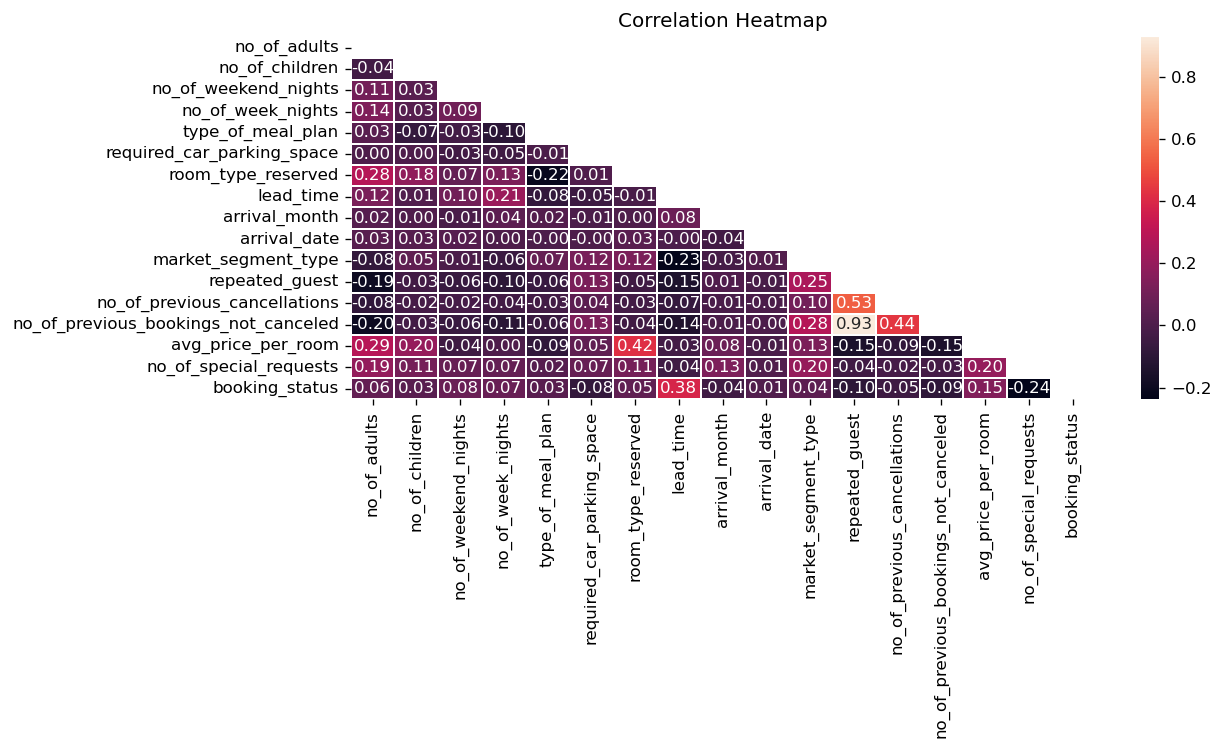

In [47]:
#Matriz de correlación 
plt.figure(dpi = 120,figsize= (10,4))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask=mask ,fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
df1=df[df['booking_status']==1]
df1.shape

(9451, 17)

In [49]:
df1.lead_time.mean()

108.44302190244419

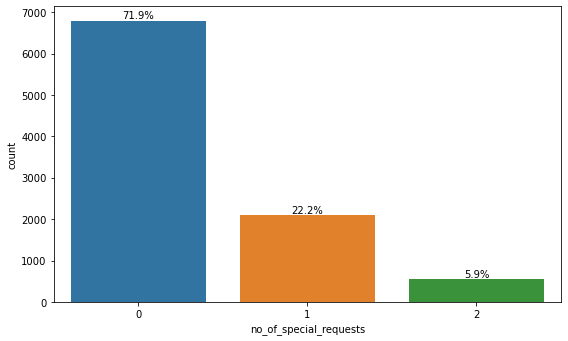

In [50]:
plt.figure(figsize = (20,25))
plt.subplot(4,2,1)
ax = sns.countplot(x = 'no_of_special_requests',data = df1)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format((100*y)/9451), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [51]:
df1.arrival_month.value_counts()

10    1359
8     1298
6     1098
7     1047
9     1012
4      874
5      735
3      677
11     611
2      428
12     289
1       23
Name: arrival_month, dtype: int64

<AxesSubplot:xlabel='arrival_date'>

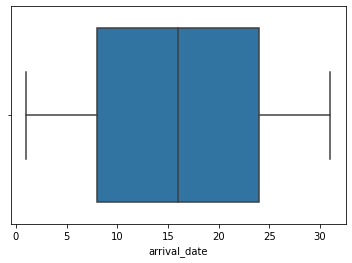

In [52]:
sns.boxplot(x="arrival_date",data=df1)

In [53]:
df0=df[df['booking_status']==0]
df0.shape

(22428, 17)

In [54]:
df0.groupby(by='arrival_month')

In [55]:
df0.lead_time.mean()

54.84693240592117

In [56]:
df0.arrival_month.value_counts()

10    3122
9     2688
12    2344
8     2115
11    1992
6     1797
4     1650
3     1601
5     1530
7     1416
2     1230
1      943
Name: arrival_month, dtype: int64

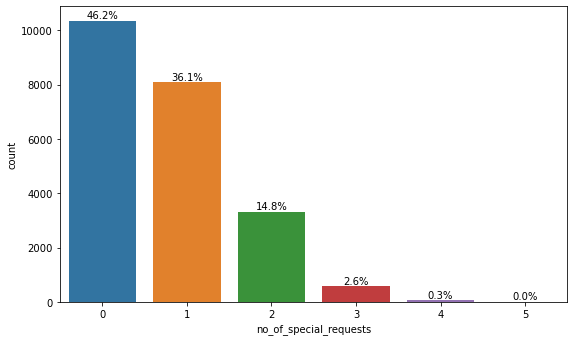

In [57]:

plt.figure(figsize = (20,25))
plt.subplot(4,2,1)
ax = sns.countplot(x = 'no_of_special_requests',data = df0)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format((100*y)/22428), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

<AxesSubplot:xlabel='arrival_date'>

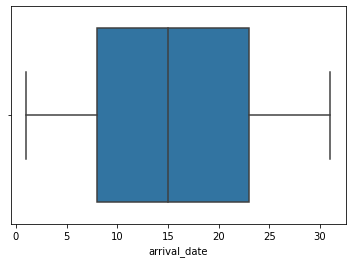

In [58]:
sns.boxplot(x="arrival_date",data=df0)

In [59]:
df0.arrival_month.describe()

count    22428.000000
mean         7.380150
std          3.279988
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

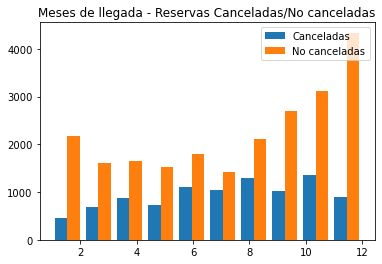

In [60]:
plt.hist([df1.arrival_month, df0.arrival_month],
label=['Canceladas', 'No canceladas'])
plt.legend(loc='upper right')
plt.title('Meses de llegada - Reservas Canceladas/No canceladas')
plt.show()

In [61]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

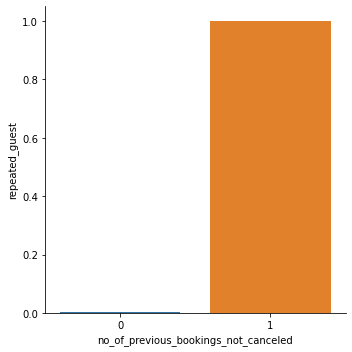

In [62]:
ax=sns.catplot(
    data=df, kind="bar",
    x="no_of_previous_bookings_not_canceled", y="repeated_guest")

# Predicción

In [63]:
#se divide el conjunto de datos
X = df.loc[:,df.columns != 'booking_status']
y = df.loc[:,'booking_status']

In [64]:
X.shape, y.shape, df.shape

((31879, 16), (31879,), (31879, 17))

In [65]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


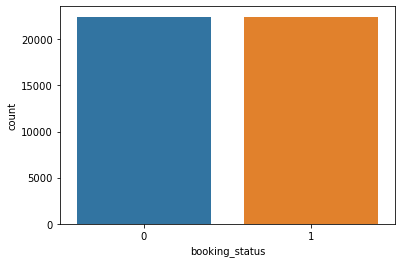

In [66]:
#Balanceo de clases
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [68]:
#Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [69]:
#Validacion
from sklearn.model_selection import train_test_split
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# XGBOOST

In [70]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
import xgboost

In [72]:
xgb = xgboost.XGBClassifier()

In [73]:
parameters = {
    'nthreads':[1],
    'objective':['binary:logistic'],
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,200]
}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
clf = GridSearchCV(xgb,parameters,cv=3,scoring='accuracy')
clf.fit(X_train,y_train,
       early_stopping_rounds=10,
       eval_metric = 'logloss',
       eval_set=[(X_test,y_test)])

[00:18:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[0]	validation_0-logloss:0.67035
[1]	validation_0-logloss:0.64987
[2]	validation_0-logloss:0.63121
[3]	validation_0-logloss:0.61429
[4]	validation_0-logloss:0.59876
[5]	validation_0-logloss:0.58454
[6]	validation_0-logloss:0.57154
[7]	validation_0-logloss:0.55938
[8]	validation_0-logloss:0.54821
[9]	validation_0-logloss:0.53775
[10]	validation_0-logloss:0.52816
[11]	validation_0-logloss:0.51895
[12]	validation_0-logloss:0.51048
[13]	validation_0-logloss:0.50294
[14]	validation_0-logloss:0.49553
[15]	validation_0-logloss:0.48862
[16]	validation_0-logloss:0.48224
[17]	validation_0-logloss:0.47631
[18]	validation_0-logloss:0.47038
[19]	validation_0-logloss:0.46499
[20]	validation_0-logloss:0.45986
[21]	validation_0-logloss:0.45516
[22]	validation_0-logloss:0.45048
[23]	validation_0-logloss:0.44

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200], 'nthreads': [1],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [76]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, nthreads=1, num_parallel_tree=None,
              predictor=None, ...)

In [77]:
clf.best_score_

0.8661940431603353

In [78]:
best_xgb = clf.best_estimator_

In [79]:
#usamos el mejor para estimar
y_test_pred=best_xgb.predict(X_valid)

In [80]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_valid, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8729266987693954


In [81]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.metrics import confusion_matrix


[[4840  708]
 [ 717 4949]]


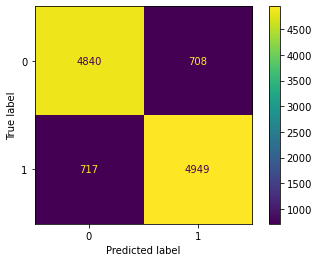

In [84]:
#Matriz de Confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


#Matriz de Confusión
cm=confusion_matrix(y_valid, y_test_pred,labels=best_xgb.classes_)
print(cm)

#Ploteamos la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_xgb.classes_)
disp.plot()

plt.show()

In [85]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_valid, y_test_pred)}")

Recall Score of the classifier is: 0.8734557006706671


In [86]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_valid, y_test_pred)}")

Precision Score of the classifier is: 0.8748453243768782


In [87]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_valid, y_test_pred)}")

F1 Score of the classifier is: 0.874149960257882


AUC for our classifier is: 0.8729210731183186


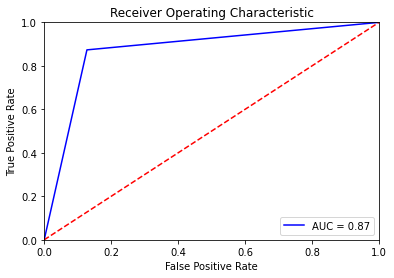

In [88]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = best_xgb.predict_proba(X_valid)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_valid, y_test_pred)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST 

In [105]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([50])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([50])})

In [106]:
bestRF=gridRandomForest.best_estimator_

In [107]:
y_test_pred=bestRF.predict(X_valid)

In [108]:
print('% de aciertos sobre el set de evaluación:',accuracy_score(y_valid, y_test_pred))
print(f"Precision Score of the classifier is: {precision_score(y_valid, y_test_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_valid, y_test_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_valid, y_test_pred)}")

% de aciertos sobre el set de evaluación: 0.8554485464597824
Precision Score of the classifier is: 0.8786744055420334
F1 Score of the classifier is: 0.8527300808576361
Recall Score of the classifier is: 0.8282739145781857


[[4900  648]
 [ 973 4693]]


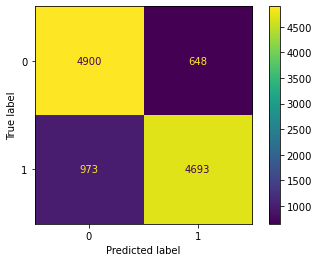

In [109]:
#Matriz de Confusión
cm=confusion_matrix(y_valid, y_test_pred,labels=bestRF.classes_)
print(cm)

#Ploteamos la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bestRF.classes_)
disp.plot()

plt.show()

AUC for our classifier is: 0.8557375340735196


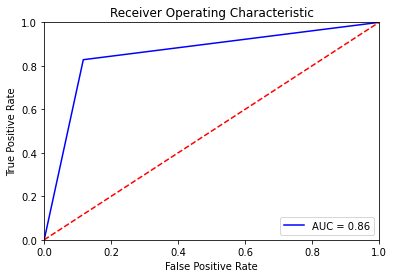

In [110]:
class_probabilities = bestRF.predict_proba(X_valid)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_valid, y_test_pred)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [112]:
feature_imp_random = pd.Series(bestRF.feature_importances_,index=X.columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.354548
no_of_special_requests                  0.172843
avg_price_per_room                      0.109429
market_segment_type                     0.103481
arrival_month                           0.080094
arrival_date                            0.042587
no_of_weekend_nights                    0.033886
no_of_week_nights                       0.028778
no_of_adults                            0.017431
type_of_meal_plan                       0.013663
required_car_parking_space              0.013075
room_type_reserved                      0.011108
repeated_guest                          0.008145
no_of_previous_bookings_not_canceled    0.006420
no_of_children                          0.003552
no_of_previous_cancellations            0.000961
dtype: float64

# ERT

In [113]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([50])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()

ert = GridSearchCV(model,values_grid,cv=3,scoring='accuracy')
ert.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([50])},
             scoring='accuracy')

In [114]:
bestERT=ert.best_estimator_


In [115]:
y_test_pred=bestERT.predict(X_valid)

In [116]:
print('% de aciertos sobre el set de evaluación:',accuracy_score(y_valid, y_test_pred))
print(f"Precision Score of the classifier is: {precision_score(y_valid, y_test_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_valid, y_test_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_valid, y_test_pred)}")

% de aciertos sobre el set de evaluación: 0.9175138220082041
Precision Score of the classifier is: 0.9143506380003495
F1 Score of the classifier is: 0.9187670150171248
Recall Score of the classifier is: 0.9232262619131663


[[5058  490]
 [ 435 5231]]


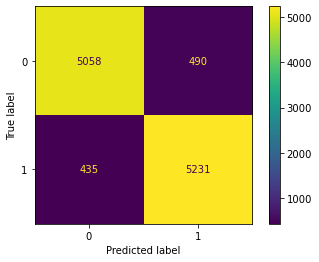

In [117]:
#Matriz de Confusión
cm=confusion_matrix(y_valid, y_test_pred,labels=bestERT.classes_)
print(cm)

#Ploteamos la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bestERT.classes_)
disp.plot()

plt.show()

AUC for our classifier is: 0.9174530732781405


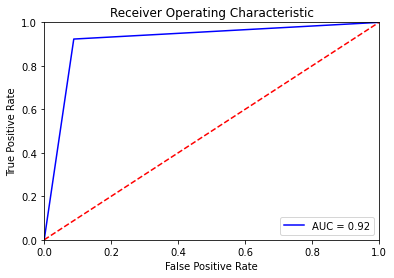

In [118]:
class_probabilities = bestERT.predict_proba(X_valid)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_valid, y_test_pred)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()